<a href="https://colab.research.google.com/github/ky13-troj/youtube_data_analysis/blob/main/youtube_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

     |████████████████████████████████| 133kB 17.7MB/s 


In [83]:
#importing Dependencies
import numpy as np
import pandas as pd                     #to manupulate dataframe
import matplotlib.pyplot as plt         #for plotting
import seaborn as sns                   #seaborn makes the matplotlib plot better to undertand
from textblob import TextBlob           #to measure sentments and stuffs in a comment
from wordcloud import WordCloud,STOPWORDS       #to create the wordcloud and stopwords to eliminate some unneccesary words like he,she....
import re                                       
import emoji                                    #to work with emoji datas
from plotly.offline import iplot                
import plotly.graph_objs as go

In [48]:
#loading the data file:
comments = pd.read_csv('/content/drive/MyDrive/collab/youtube_data_analysis/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [49]:
#printing the first 5 data in the datset
comments.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

In [50]:
#Measuring the sentiment polarity of a comment text
TextBlob('Its more accurate to call it the M+ (1000) be...	').sentiment.polarity

0.45000000000000007

In [51]:
#checking for columns having null values and all total number of null value
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [52]:
#dropping the datas where null value exists
comments.dropna(inplace=True)

In [53]:
#checking if all the null values are removed or not
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

**Now our dataframe is ready to proceed further.**
*    **What we did in this section:**
1.   *we read the dataset*
2.   *we checked how the dataframe looks like*
3.   *we checked if there exists null values in entire dataset or not,becauseif ther exists a null value we cannot perform anything on that particular data point and it may cause certain errors and even if it doesn't produce any errors we must understand that absence of any data points in a dataset can reduce the accuracy of model predictions.*
4.   *we dropped those datapoints that consists null values.*


In [54]:
Polarity = []

In [55]:
for j in comments['comment_text'] :
  Polarity.append(TextBlob(j).sentiment.polarity)

In [56]:
Polarity

[0.45000000000000007,
 0.0,
 0.0,
 0.0,
 1.0,
 0.30000000000000004,
 0.0,
 -0.10000000000000003,
 0.028571428571428564,
 0.5,
 0.5,
 0.0,
 0.30000000000000004,
 0.026562500000000003,
 0.5,
 0.5,
 0.2,
 0.25,
 0.5,
 0.3,
 0.0,
 0.0,
 0.1,
 0.26684220251293417,
 0.0,
 0.37878787878787873,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.0,
 0.6000000000000001,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.4333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 -0.4,
 0.0,
 0.6,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.05,
 0.0,
 -0.78125,
 0.0,
 0.04999999999999999,
 0.16666666666666666,
 -0.05,
 -0.125,
 0.0,
 0.26,
 0.25,
 -0.01171875,
 0.0,
 -0.175,
 0.0,
 -0.4,
 0.5,
 0.0,
 0.13636363636363635,
 0.0,
 0.0,
 0.5444444444444444,
 0.25,
 0.0,
 0.13636363636363

In [57]:
#creating a newcolumn in comments named polarity that stores the value of array polarity
comments['Polarity'] = Polarity

In [ ]:
comments.head(20)

video_id  ...  Polarity
0   jt2OHQh0HoQ  ...  0.450000
1   jt2OHQh0HoQ  ...  0.000000
2   jt2OHQh0HoQ  ...  0.000000
3   jt2OHQh0HoQ  ...  0.000000
4   jt2OHQh0HoQ  ...  1.000000
5   jt2OHQh0HoQ  ...  0.300000
6   jt2OHQh0HoQ  ...  0.000000
7   jt2OHQh0HoQ  ... -0.100000
8   jt2OHQh0HoQ  ...  0.028571
9   jt2OHQh0HoQ  ...  0.500000
10  jt2OHQh0HoQ  ...  0.500000
11  jt2OHQh0HoQ  ...  0.000000
12  jt2OHQh0HoQ  ...  0.300000
13  jt2OHQh0HoQ  ...  0.026563
14  jt2OHQh0HoQ  ...  0.500000
15  jt2OHQh0HoQ  ...  0.500000
16  jt2OHQh0HoQ  ...  0.200000
17  jt2OHQh0HoQ  ...  0.250000
18  jt2OHQh0HoQ  ...  0.500000
19  jt2OHQh0HoQ  ...  0.300000

[20 rows x 5 columns]

In [58]:
#checking which comments are absulately positive that is +ve sentiment
#to be noted: +1 stands for completely pos sentiment and -1 stands for completely negative sentiment
comments_positive = comments[comments['Polarity'] == 1]     

In [59]:
#checking the number of datapoints that has positive sentiment
comments_positive.shape

(20400, 5)

In [60]:
#printing 1st 5 data points from positive sentiment
comments_positive.head()

video_id  ... Polarity
4    jt2OHQh0HoQ  ...      1.0
26   jt2OHQh0HoQ  ...      1.0
80   jt2OHQh0HoQ  ...      1.0
158  YPVcg45W0z4  ...      1.0
175  YPVcg45W0z4  ...      1.0

[5 rows x 5 columns]

In [61]:
#calling the stopwords
stopwords = set(STOPWORDS)

In [62]:
#joing all the positive comments
total_pos_comments = ' '.join(comments_positive['comment_text'])

In [63]:
#displaying all the positive comments joined together
total_pos_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [64]:
#creating the wordcloud
pos_wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_pos_comments)

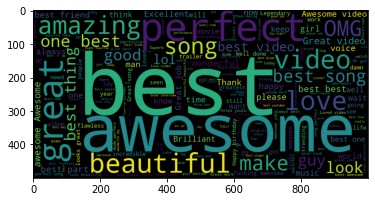

In [65]:
#plotting the wordcloud
plt.imshow(pos_wordcloud)

In [66]:
#plotting the wordcloud
plt.figure(figsize=(15,9)) #resizing the o/p wordcloud
plt.axis('off')            #turning off the axis of the wordcloud plot
plt.imshow(pos_wordcloud)



```
# The Wordcloud is nothing but showing the most and least use cases of certain comment.
```


```
# Bigger the size of a wordin a Wordcloud more the number of that particular word used in the comment
```


```
# Smaller the size of a wordin a Wordcloud lesser the number of that particular word used in the comment
```






**Doing the same process for negative comments**

In [67]:
comments_negative = comments[comments['Polarity'] == -1]

In [68]:
comments_negative.shape

(3339, 5)

In [69]:
comments_negative.head()

video_id  ... Polarity
1387  ql0Op1VcELw  ...     -1.0
1394  ql0Op1VcELw  ...     -1.0
1530  -Ifnaxi2LQg  ...     -1.0
1745  F2uJvwiSZAQ  ...     -1.0
1793  F2uJvwiSZAQ  ...     -1.0

[5 rows x 5 columns]

In [70]:
total_neg_comments = ' '.join(comments_negative['comment_text'])

In [71]:
neg_wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_neg_comments)

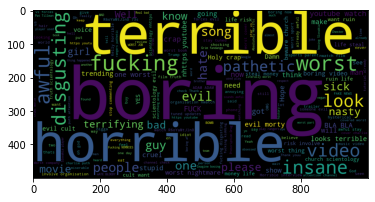

In [72]:
plt.imshow(neg_wordcloud)

In [73]:
plt.figure(figsize=(15,9))
plt.axis('off')
plt.imshow(neg_wordcloud)

**What We did in this segment:**
1.  we checke the polarity of all the comments.
2.  we stored all the polarity value in a var array.
3.  we then added a column in the dataframe using the values of sentiment polarity
4.  we collected all the (completely)positive/negative comments.
5.  we opt out the stopwords
6. we plotted the wordcloud

**Our first step of analysing the youtube data that is to check the sentiments of the comments and plot them accordingle using wordcloud is done.**

# Analysing the Tags

In [74]:
#reading the dataset
videos = pd.read_csv('/content/drive/MyDrive/collab/youtube_data_analysis/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [75]:
videos.head()

video_id  ...   date
0  XpVt6Z1Gjjo  ...  13.09
1  K4wEI5zhHB0  ...  13.09
2  cLdxuaxaQwc  ...  13.09
3  WYYvHb03Eog  ...  13.09
4  sjlHnJvXdQs  ...  13.09

[5 rows x 11 columns]

In [76]:
#print the tags
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [77]:
#joing the tags
tags = ' '.join(videos['tags'])

In [78]:
tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 



```
# we can see the tags contains '|' this character but this isnot neccesary for our analysis. so wee need to remove this impurity.
```



In [84]:
# removing the impurities by printing only alphabets
filterred_tags = re.sub('[^a-zA-Z]',' ',tags)

In [85]:
filterred_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 



```
# Here we can see there is more than one space. So, we need to remove those extra spaces.
```



In [86]:
#removing the extra spaces
filt_tags = re.sub(' +',' ',filterred_tags)

In [87]:
#checking iff our data is ready to proceed further or not
filt_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [88]:
#creating the wordcloud for tags
tag_wordcloud = WordCloud(width = 1000,height=500,stopwords=stopwords).generate(filt_tags)

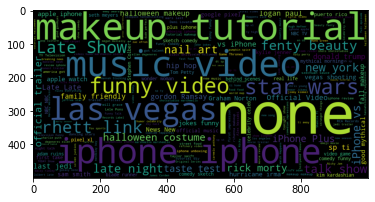

In [89]:
plt.imshow(tag_wordcloud)

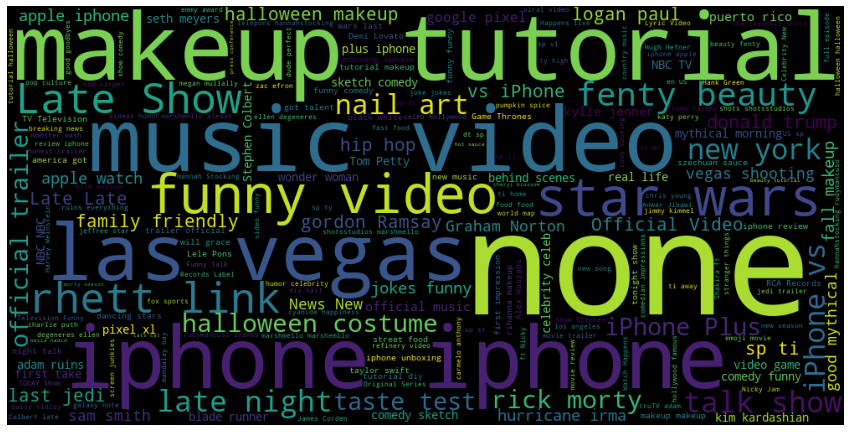

In [90]:
plt.figure(figsize=(15,9))
plt.axis('off')
plt.imshow(tag_wordcloud)



```
# none stands for no tags. we can see none is the biggest .So, we can conclude that most of the videos (data available in our dataset) doesn't contains any tags
```



**Now we need to check howlikes ,dislikes behaves with respect to views**

Text(0.5, 1.0, 'Regression Plot for Views vs Likes')

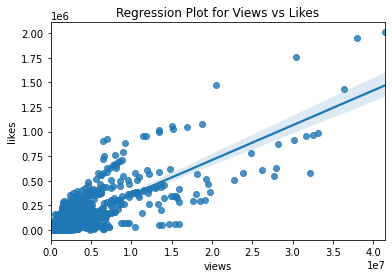

In [91]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression Plot for Views vs Likes')

*we can see that number of likes increases w.r.t to the number of views*

Text(0.5, 1.0, 'Regression plot for Views vs Dislikes')

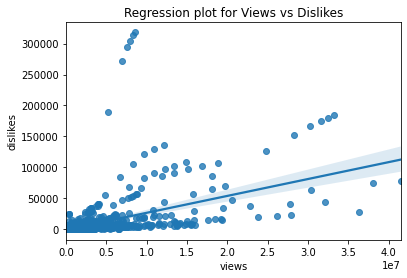

In [92]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for Views vs Dislikes')

*we can see the number of dislikes increses with increase in views but not so much with respect to views vs likes*

**Now we need to find the co realtion betweenviews likes and dislikes**

In [93]:
#calling the values of views likes and dislikes
df_corr = videos[['views','likes','dislikes']]

In [94]:
#calculating the co relation
cor = df_corr.corr() 

In [95]:
#print the corelation
cor

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

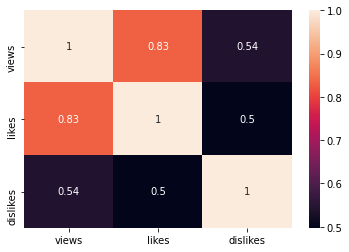

In [96]:
#plotting heatmap of co relation
sns.heatmap(cor,annot=True)

**What we did in this segment:**
1.  we collected all the tags that is available in the dataset
2.  we printed the tags to understyand the data
3.  we found out the impurities which isnot neccesary for our analysis
4.  we opted out the data impurities
5.  we joined all the tags and created a wordcloud

6.  we plotted views vs likes and dislikes graph
7.  we found out the dependency of like and dislike on basis of views 
8.  to understand their relation better we determned the correaltion
9.  we plotted the correlation in a heatmap

# Analysing the Emojis present in the comment:

In [97]:
#Dropping the null values in the comment_text column otherwise it can cause error
comments.dropna(axis=0,subset=['comment_text'],inplace=True)

In [98]:
#storing the emojis in a variable 
str=''
for i in comments['comment_text']:
  list = [c for c in i if c in emoji.UNICODE_EMOJI['en']]
  for ele in list :
    str = str+ele

In [101]:
#detecting the length of the variables containing emojis
len(str) 

333278

In [102]:
#printing the emojis:
str 

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊😊😍😊❤❤❤❤😍

In [103]:
#creating a dictionary that stores the occurance of emojis and their corresponding numbers
result={}
for i in set(str):
  result[i] = str.count(i)

In [104]:
# viewing the dictionary
result

{'⛸': 5,
 '💨': 84,
 '🎿': 10,
 '📈': 12,
 '🍉': 109,
 '🎼': 97,
 '📵': 6,
 '😯': 196,
 '🕟': 17,
 '🧣': 1,
 '🙄': 765,
 '🎑': 6,
 '🎏': 8,
 '♋': 15,
 '👱': 57,
 '😵': 260,
 '⚛': 8,
 '🆓': 8,
 '⬅': 16,
 '👩': 222,
 '🤯': 3,
 '🥇': 41,
 '🎛': 7,
 '😒': 570,
 '🏇': 12,
 '📉': 36,
 '♾': 4,
 '👹': 89,
 '♣': 23,
 '😸': 108,
 '🔒': 18,
 '🗃': 5,
 '💩': 638,
 '🍺': 48,
 '🃏': 10,
 '⏺': 5,
 '❓': 42,
 '👮': 31,
 '🔷': 106,
 '🆗': 12,
 '🍞': 19,
 '📅': 12,
 '☣': 19,
 '🎻': 30,
 '❣': 647,
 '🚓': 8,
 '㊙': 5,
 '👞': 34,
 '🕣': 7,
 '🥗': 7,
 '🔈': 7,
 '🔶': 189,
 '🚆': 7,
 '🈷': 16,
 '👲': 16,
 '🐸': 95,
 '⛰': 9,
 '🔱': 37,
 '🥘': 6,
 '🗄': 4,
 '💭': 56,
 '〽': 31,
 '🦑': 12,
 '🔢': 5,
 '🍹': 37,
 '💕': 6531,
 '💧': 59,
 '😃': 1327,
 '🥁': 17,
 '💵': 118,
 '👴': 40,
 '💍': 139,
 '⏬': 6,
 '🎱': 12,
 '🆒': 15,
 '💉': 24,
 '📕': 10,
 '🎈': 736,
 '🛅': 6,
 '🧐': 3,
 '🙌': 2734,
 '👠': 66,
 '👉': 199,
 '🚥': 8,
 '🚚': 12,
 '🐾': 87,
 '🏎': 7,
 '🔽': 7,
 '🈂': 5,
 '🥂': 33,
 '👇': 297,
 '🗿': 18,
 '🌺': 312,
 '🖱': 11,
 '🛌': 13,
 '🏐': 6,
 '⬆': 23,
 '🏔': 11,
 '😖': 299,
 '🍲': 17,
 '💶': 

In [105]:
#sorting the emojis according their occurance number
final = {}
for key,value in sorted(result.items(),key = lambda item:item[1]) :
  final[key]=value

In [106]:
final

{'🧣': 1,
 '🥌': 1,
 '🥡': 1,
 '🤺': 1,
 '🛷': 1,
 '🥨': 1,
 '🥜': 1,
 '🤹': 1,
 '🧤': 1,
 '🦓': 1,
 '🤾': 1,
 '🛒': 1,
 '🤽': 1,
 '🦏': 1,
 '🥚': 1,
 '🤟': 1,
 '🧠': 1,
 '🥟': 1,
 '🧢': 2,
 '🥅': 2,
 '🦕': 2,
 '🦖': 2,
 '🧛': 2,
 '🎌': 2,
 '🦔': 2,
 '🧒': 2,
 '🧘': 2,
 '🧝': 2,
 '🤱': 2,
 '🧡': 2,
 '🤯': 3,
 '🧐': 3,
 '🥖': 3,
 '🤨': 3,
 '🤫': 3,
 '🥄': 3,
 '♾': 4,
 '🗄': 4,
 '🦐': 4,
 '💹': 4,
 '🤬': 4,
 '🛣': 4,
 '🖍': 4,
 '🗓': 4,
 '⏏': 4,
 '🛬': 4,
 '🛢': 4,
 '🥈': 4,
 '♟': 4,
 '🦍': 4,
 '🥞': 4,
 '⏸': 4,
 '⏲': 4,
 '🏷': 4,
 '⏹': 4,
 '🏌': 4,
 '☦': 4,
 '⚗': 4,
 '🗂': 4,
 '🦆': 4,
 '🧟': 4,
 '⏯': 4,
 '🤵': 4,
 '☸': 4,
 '🖇': 4,
 '🥝': 4,
 '⚙': 4,
 '⚧': 4,
 '⛸': 5,
 '🗃': 5,
 '⏺': 5,
 '㊙': 5,
 '🔢': 5,
 '🈂': 5,
 'ℹ': 5,
 '🖨': 5,
 '➿': 5,
 '🥛': 5,
 '🔖': 5,
 '🆖': 5,
 '✡': 5,
 '🏮': 5,
 '🗜': 5,
 '🕎': 5,
 '🔃': 5,
 '🚠': 5,
 '🔁': 5,
 '🗒': 5,
 '🚎': 5,
 '🗳': 5,
 '🔤': 5,
 '↔': 5,
 '🧖': 5,
 '⚒': 5,
 '🈳': 5,
 '🈵': 5,
 '↪': 5,
 '🖼': 5,
 '🈴': 5,
 '🔂': 5,
 'Ⓜ': 5,
 '🚛': 5,
 '🕹': 5,
 '🧜': 5,
 '🤮': 5,
 '🔲': 5,
 '🥉': 5,
 '🌫': 5,
 '🛋': 5,
 '◽': 5,
 '🔠': 5,
 

In [107]:
#creating another dictionary that contains only the sorted emojis:
keys = [*final.keys()]

In [108]:
keys

['🧣',
 '🥌',
 '🥡',
 '🤺',
 '🛷',
 '🥨',
 '🥜',
 '🤹',
 '🧤',
 '🦓',
 '🤾',
 '🛒',
 '🤽',
 '🦏',
 '🥚',
 '🤟',
 '🧠',
 '🥟',
 '🧢',
 '🥅',
 '🦕',
 '🦖',
 '🧛',
 '🎌',
 '🦔',
 '🧒',
 '🧘',
 '🧝',
 '🤱',
 '🧡',
 '🤯',
 '🧐',
 '🥖',
 '🤨',
 '🤫',
 '🥄',
 '♾',
 '🗄',
 '🦐',
 '💹',
 '🤬',
 '🛣',
 '🖍',
 '🗓',
 '⏏',
 '🛬',
 '🛢',
 '🥈',
 '♟',
 '🦍',
 '🥞',
 '⏸',
 '⏲',
 '🏷',
 '⏹',
 '🏌',
 '☦',
 '⚗',
 '🗂',
 '🦆',
 '🧟',
 '⏯',
 '🤵',
 '☸',
 '🖇',
 '🥝',
 '⚙',
 '⚧',
 '⛸',
 '🗃',
 '⏺',
 '㊙',
 '🔢',
 '🈂',
 'ℹ',
 '🖨',
 '➿',
 '🥛',
 '🔖',
 '🆖',
 '✡',
 '🏮',
 '🗜',
 '🕎',
 '🔃',
 '🚠',
 '🔁',
 '🗒',
 '🚎',
 '🗳',
 '🔤',
 '↔',
 '🧖',
 '⚒',
 '🈳',
 '🈵',
 '↪',
 '🖼',
 '🈴',
 '🔂',
 'Ⓜ',
 '🚛',
 '🕹',
 '🧜',
 '🤮',
 '🔲',
 '🥉',
 '🌫',
 '🛋',
 '◽',
 '🔠',
 '🈯',
 '🎐',
 '↖',
 '🈹',
 '⛱',
 '🚁',
 '♦',
 '🔄',
 '↕',
 '⛩',
 '🖲',
 '🔼',
 '🛂',
 '🔣',
 '◻',
 '🛥',
 '🚉',
 '🔚',
 '🚻',
 '🚟',
 '☂',
 '🦒',
 '🗞',
 '🈲',
 '🔳',
 '⌨',
 '❎',
 '🆔',
 '🖊',
 '⚾',
 '🛤',
 '⛏',
 '♠',
 '🈁',
 '🔡',
 '↩',
 '🆎',
 '⛴',
 '📵',
 '🎑',
 '🥘',
 '⏬',
 '🛅',
 '🏐',
 '🚏',
 '㊗',
 '🏧',
 '⤵',
 '🕰',
 '🚺',
 '🌥',
 '🕴',
 '🚦',
 '🏸',
 '🛁',
 '🦇'

In [109]:
#Creating another dictionary that only contains the occurance number of the sorted emojis
values = [*final.values()]

In [110]:
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [111]:
#creating a dataframe with last 20 datapoints
df = pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [112]:
#printing the dataset
df

chars    num
0      🙌   2734
1      🏼   2961
2      💙   2968
3      💗   3071
4      👌   3534
5      💜   3616
6      🏻   4412
7      💖   4809
8      😊   4946
9      👏   5357
10     😬   5489
11     👍   5817
12     😘   6334
13     💕   6531
14     ♥   7173
15     😭   9098
16     🔥  10249
17     😍  34856
18     ❤  36780
19     😂  43947

In [113]:
# preparing the data for barplot
trace = go.Bar(x=df['chars'],y=df['num'])

In [114]:
#plotting the the emoji and their occurance in a barplot
iplot([trace])